<a href="https://colab.research.google.com/github/polymoe/datascientest/blob/main/Compl%C3%A9ments_couches_denses_corrig%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://assets-datascientest.s3-eu-west-1.amazonaws.com/train/logo_datascientest.png" style="height:150px;center"></center>

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Deep-Learning - Modules complémentaires</h1></center>
<center><h2>Compléments sur le dataset MNIST</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">


Le but de cet exercice est d'approfondir nos connaissances sur l'entraînement d'un modèle en deep learning.

 Nous allons travailler avec la base de données **```MNIST```**. Cette base contient des images de chiffres manuscrits que nous tenterons de classifier.

> Nous aborderons les points suivants : 
>> I - [Préparation du dataset](#preparation)
>>
>>
>> II - [Influence de la taille des batchs](#batch_size)
>>> A - [Pour nombre d'epoch fixé](#fixed_epochs)
>>>
>>>
>>> B - [Pour un nombre d'itérations fixé](#fixed_iterations)
>>
>>
>> III - [Illustration du surentraînement](#overfitting)
>>
>>
>> IV - [Influence du nombre d'images dans le jeu d'entraînement](#train_size)
>>
>>
>> V - [Influence de l'architecture du réseau de neurones](#architecture)
>>> A - [Architecture très basique VS architecture plus complexes](#dense)
>>>
>>>
>>> B - [Introduction aux réseaux de neurones convolutionnels](#CNN)

- (a) Exécuter la cellule ci-dessous pour importer les modules nécessaires à l'exercice ainsi que le dataset ```MNIST```.

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from keras.datasets.mnist import load_data
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

import time

(X_train, y_train), (X_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


- (b) Afficher, dans une grille de figures, 6 images tirées aléatoirement de l'échantillon ```X_train```, avec en titre les labels correspondants de ```y_train```.
> - Cet affichage a déjà été fait dans le premier notebook du cours.

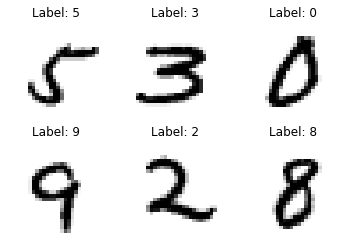

In [ ]:
j = 1
for i in np.random.choice(np.arange(0, len(y_train)), size = 6):
    img = X_train[i] 
    plt.subplot(2, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, cmap=cm.binary, interpolation='None')
    plt.title('Label: ' + str(y_train[i]))

# <a name="preparation"></a> I - Préparation du dataset

- (a) Changer la forme des images de ```X_train``` et de ```X_test``` en des vecteurs de tailles **28*28** à l'aide de la méthode ```reshape```.

In [ ]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])
print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)

Shape of X: (60000, 784)
Shape of y: (60000,)


- (b) Pour une meilleure performance du modèle, réduire les pixels des données ```X_train``` et ```X_test``` afin qu'ils soient compris entre 0 et 1. 
> - Diviser **l'ensemble de l'échantillon** par 255.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

- (c) Transformer les labels de ```y_train``` et ```y_test``` en vecteurs catégoriels binaires (one hot) grâce à la fonction to_categorical du sous-module ```np_utils``` de ```keras```.

- (d) Extraire dans des variables appelées respectivement ```num_pixels``` et ```num_classes``` le nombre de colonnes (pixels) de ```X_train``` et le nombre de colonnes (classes) de ```y_test```.

In [ ]:
y_train = np_utils.to_categorical(y_train, dtype = 'int') # Veiller à n'exécuter cette instruction qu'une seule fois
y_test = np_utils.to_categorical(y_test, dtype = 'int')   # Veiller à n'exécuter cette instruction qu'une seule fois

# La méthode *np_utils.to_categorical* transforme les chiffres en vecteurs
# remplis de zéros, sauf à la position du chiffre en question qui vaut 1 
# Par exemple, 3 devient (0,0,0,1,0,0,0,0,0,0)

# Ainsi y_train et y_test deviennent des matrices de mêmes nombres de lignes mais avec autant
# de colonnes que de classes (chiffres uniques) qu'elles possèdent.

num_pixels = X_train.shape[1]
num_classes = y_test.shape[1]

# <a name="batch_size"></a> II - Influence de la taille des batchs



## <a name="fixed_epochs"></a> A - Nombre fixe d'epoch

- (a) Définir une liste ```batch_sizes``` contenant les valeurs ```[1, 20, 50, 200, 500, 2000, 4000]```.

In [ ]:
batch_sizes = [1, 20, 50, 200, 500, 2000, 4000]

Nous allons utiliser le modèle suivant :


```
  model = Sequential()
  model.add(Dense(units = 20, input_dim = num_pixels, kernel_initializer ='normal', activation ='tanh'))             
  model.add(Dense(units = num_classes, kernel_initializer ='normal', activation ='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
```



- (b) Pour chaque taille de batch défini dans ```batch_sizes```, définir et entraîner le modèle sur les données ```X_train``` et ```y_train``` grâce à la méthode ```fit``` :
>  - L'entraînement devra se faire sur 5 epochs (paramètre ```epochs```).
>
>  - La performance du modèle devra être évaluée sur un échantillon de validation contenant 20% des données (paramètre ```validation_split```).
>
>  - La sortie des entraînements devra être stockée dans une liste nommée ```training_histories_fixed_epoch```.

- (c) Stocker dans une liste ```times_fixed_epoch``` la durée de chaque entraînement.

In [ ]:
training_histories_fixed_epoch = []
times_fixed_epoch = []

for batch_size in batch_sizes:
  model = Sequential()
  model.add(Dense(units = 20, input_dim = num_pixels, kernel_initializer ='normal', activation ='tanh'))             
  model.add(Dense(units = num_classes, kernel_initializer ='normal', activation ='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  begin = time.time()
  training_histories_fixed_epoch.append(model.fit(X_train, y_train, epochs = 5, batch_size = batch_size, validation_split = 0.2))
  end = time.time()
  times_fixed_epoch.append(end-begin)

Epoch 1/5
48000/48000 [==============================] - 73s 1ms/step - loss: 0.4925 - accuracy: 0.8680 - val_loss: 0.2450 - val_accuracy: 0.9297
Epoch 2/5
48000/48000 [==============================] - 60s 1ms/step - loss: 0.2283 - accuracy: 0.9341 - val_loss: 0.2291 - val_accuracy: 0.9340
Epoch 3/5
48000/48000 [==============================] - 62s 1ms/step - loss: 0.2013 - accuracy: 0.9394 - val_loss: 0.2059 - val_accuracy: 0.9413
Epoch 4/5
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1788 - accuracy: 0.9470 - val_loss: 0.2039 - val_accuracy: 0.9426
Epoch 5/5
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1686 - accuracy: 0.9498 - val_loss: 0.1918 - val_accuracy: 0.9453
Epoch 1/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.8509 - accuracy: 0.8002 - val_loss: 0.2527 - val_accuracy: 0.9287
Epoch 2/5
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2456 - accuracy: 0.9294 - val_loss: 0.2097 - val_a

- (d) Tracer sur un même graphe l'évolution de la précision d'entraînement en fonction de l'epoch pour chaque taille de batch.

- (e) Sur un second graphe, tracer le temps d'entraînement du modèle pour chaque taille de batch.

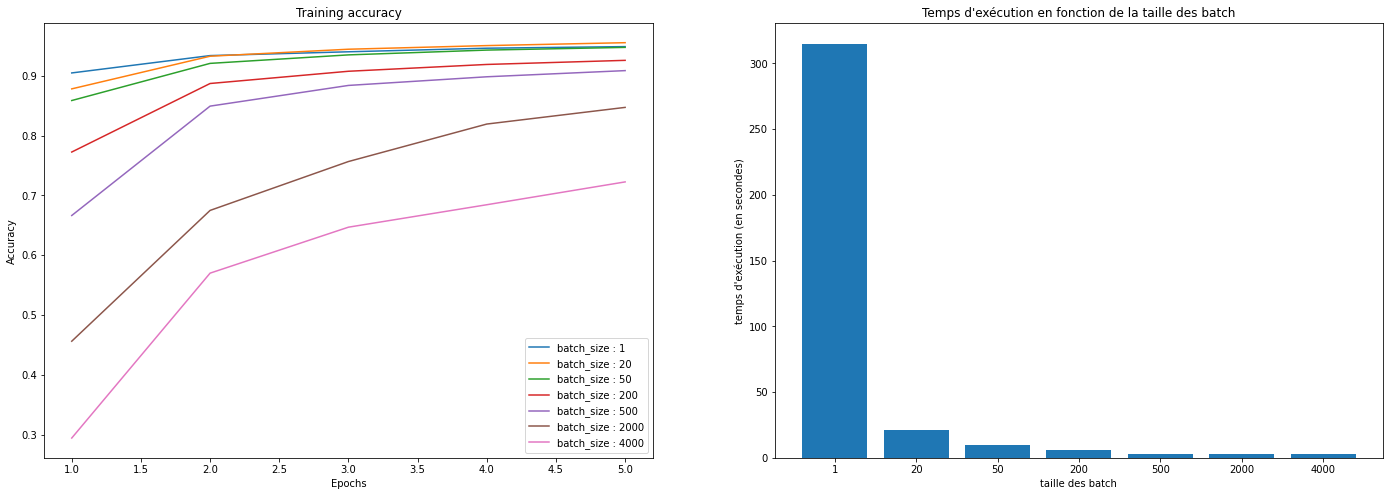

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(121)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
for i in range(len(batch_sizes)):
  plt.plot(np.arange(1,6,1), training_histories_fixed_epoch[i].history['accuracy'], label='batch_size : {}'.format(batch_sizes[i]))
plt.legend()

plt.subplot(122)
plt.title("Temps d'exécution en fonction de la taille des batch")
plt.xlabel("taille des batch")
plt.ylabel("temps d'exécution (en secondes)")
plt.bar(np.arange(1,8,1), times_fixed_epoch)
plt.xticks(ticks=np.arange(1,8,1), labels=batch_sizes);

## <a name="fixed_iterations"></a> B - Nombre fixe d'itérations

- (f) Définir une liste ```batch_sizes_2``` contenant les valeurs ```[20, 50, 200, 500, 2000, 4000]```.

- (g) Définir une liste ```epochs``` contenant les valeurs de ```batch_size_2``` divisées par 5.
>  - Cela permettra d'entrainer le modèle sur un nombre fixe d'itération plutôt qu'un nombre fixe d'epochs.
>
>  - Attention à ce que les valeurs de ```epochs``` soient bien des valeurs entières.

In [ ]:
batch_sizes_2 = [20, 50, 200, 500, 2000, 4000]
epochs = [np.int(x/5) for x in batch_sizes_2]

- (h) Pour chaque taille de batch défini dans ```batch_sizes```, définir et entraîner le modèle sur les données ```X_train``` et ```y_train``` grâce à la méthode ```fit``` :
>  - L'entraînement devra se faire avec les éléments de la liste ```epoch``` (paramètre ```epochs```).
>
>  - La perfomance du modèle devra être évaluée sur un échantillon de validation contenant 20% des données (paramètre ```validation_split```).
>
>  - La sortie des entraînements devra être stockée dans une liste nommée ```training_histories_fixed_iterations```.

- (i) Stocker dans une liste ```times_fixed_iterations``` la durée de chaque entraînement.

In [ ]:
training_histories_fixed_iterations = []
times_fixed_iterations = []

for i in range(len(batch_sizes_2)):
  model = Sequential()
  model.add(Dense(units = 20, input_dim = num_pixels, kernel_initializer ='normal', activation ='tanh'))             
  model.add(Dense(units = num_classes, kernel_initializer ='normal', activation ='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  begin = time.time()
  training_histories_fixed_iterations.append(model.fit(X_train, y_train, epochs = epochs[i], batch_size = batch_sizes_2[i], validation_split = 0.2))
  end = time.time()
  times_fixed_iterations.append(end-begin)

Epoch 1/4
2400/2400 [==============================] - 4s 2ms/step - loss: 0.8414 - accuracy: 0.8149 - val_loss: 0.2539 - val_accuracy: 0.9248
Epoch 2/4
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9282 - val_loss: 0.2182 - val_accuracy: 0.9371
Epoch 3/4
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2045 - accuracy: 0.9424 - val_loss: 0.2016 - val_accuracy: 0.9425
Epoch 4/4
2400/2400 [==============================] - 4s 2ms/step - loss: 0.1802 - accuracy: 0.9479 - val_loss: 0.1925 - val_accuracy: 0.9457
Epoch 1/10
960/960 [==============================] - 2s 2ms/step - loss: 1.1064 - accuracy: 0.7620 - val_loss: 0.3106 - val_accuracy: 0.9160
Epoch 2/10
960/960 [==============================] - 2s 2ms/step - loss: 0.3054 - accuracy: 0.9164 - val_loss: 0.2459 - val_accuracy: 0.9321
Epoch 3/10
960/960 [==============================] - 2s 2ms/step - loss: 0.2442 - accuracy: 0.9314 - val_loss: 0.2213 - val_accuracy: 0.9374
Ep

- (j) Tracer sur un même graphe l'évolution de la précision d'entraînement en fonction des itérations pour chaque taille de batch.

- (k) Sur un second graphe, tracer le temps d'entraînement du modèle pour chaque taille de batch.

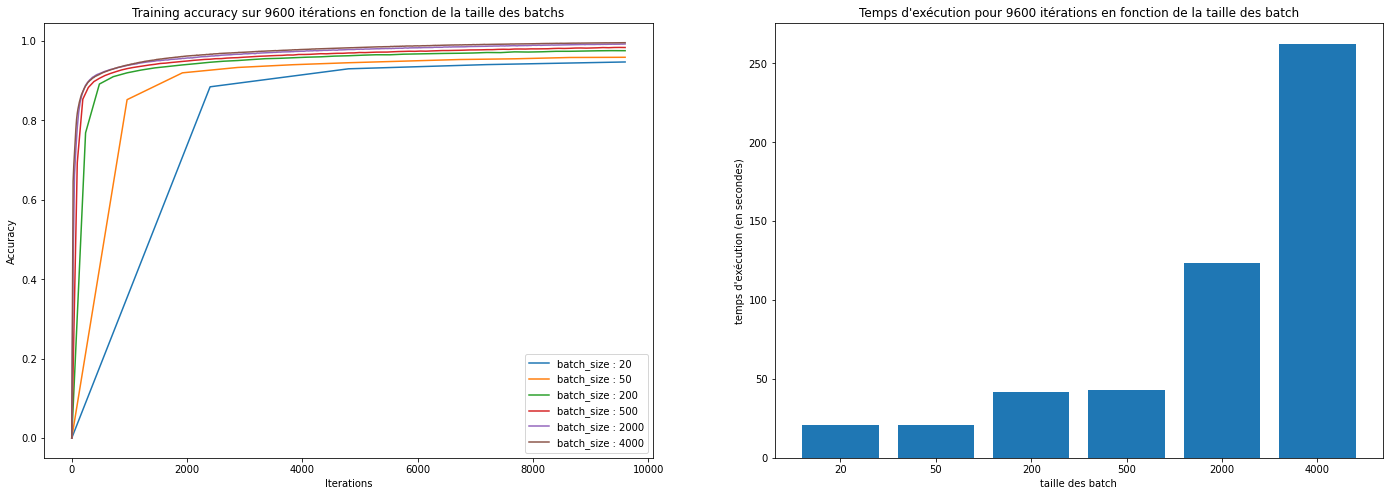

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(121)
plt.title('Training accuracy sur 9600 itérations en fonction de la taille des batchs')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
for i in range(len(batch_sizes_2)):
  plt.plot(np.arange(0,9601, 9600/epochs[i]), [0]+training_histories_fixed_iterations[i].history['accuracy'], label='batch_size : {}'.format(batch_sizes_2[i]))
plt.legend()

plt.subplot(122)
plt.title("Temps d'exécution pour 9600 itérations en fonction de la taille des batch")
plt.xlabel("taille des batch")
plt.ylabel("temps d'exécution (en secondes)")
plt.bar(np.arange(1,7,1), times_fixed_iterations)
plt.xticks(ticks=np.arange(1,7,1), labels=batch_sizes_2);

On remarque que plus on entraîne notre modèle, plus la précision d'entraînement augmente. On peut alors penser que plus on entraîne notre modèle, meilleure sera la prédiction.

Ceci est très loin de la vérité. C'est même un des problèmes les plus classiques en deep learning, qu'on appelle **le surentraînement** (ou **overfitting**)

# <a name="overfitting"></a> III - Illustration du surentraînement

- (a) Instancier le même modèle que lors de la partie précédente.

- (b) Entraîner le modèle sur les données ```X_train``` et ```y_train``` grâce à la méthode ```fit``` :
>  - L'entraînement devra se faire sur **100** epochs (paramètre ```epochs```).
>
>  - Les batchs devront avoir une taille de 20 (paramètre ```batch_size```)
>
>  - La perfomance du modèle devra être évaluée sur un échantillon de validation contenant 20% des données (paramètre ```validation_split```).
>
>  - La sortie de l'entraînement devra être stockée dans une variable nommée ```training_history```.

In [ ]:
model = Sequential()
model.add(Dense(units = 20, input_dim = num_pixels, kernel_initializer ='normal', activation ='tanh'))             
model.add(Dense(units = num_classes, kernel_initializer ='normal', activation ='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
training_history = model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
2400/2400 [==============================] - 4s 1ms/step - loss: 0.8484 - accuracy: 0.8110 - val_loss: 0.2528 - val_accuracy: 0.9282
Epoch 2/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2474 - accuracy: 0.9297 - val_loss: 0.2065 - val_accuracy: 0.9413
Epoch 3/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1949 - accuracy: 0.9458 - val_loss: 0.1906 - val_accuracy: 0.9444
Epoch 4/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1656 - accuracy: 0.9512 - val_loss: 0.1790 - val_accuracy: 0.9496
Epoch 5/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1539 - accuracy: 0.9550 - val_loss: 0.1783 - val_accuracy: 0.9495
Epoch 6/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1359 - accuracy: 0.9601 - val_loss: 0.1776 - val_accuracy: 0.9488
Epoch 7/100
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1397 - accuracy: 0.9580 - val_loss: 0.1713 - val_ac

- (c) Tracer sur un même graphe l'évolution des précisions d'entraînement et de validation. Que remarquez-vous?

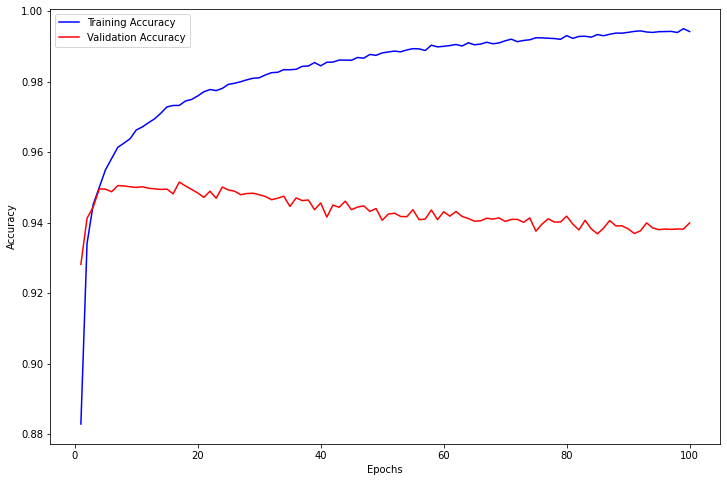

In [ ]:
plt.figure(figsize=(12,8))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(np.arange(1 , 101, 1), training_history.history['accuracy'], label = 'Training Accuracy', color = 'blue')
plt.plot(np.arange(1 , 101, 1), training_history.history['val_accuracy'], label = 'Validation Accuracy', color = 'red')
plt.legend();

# <a name="train_size"></a> IV - Influence du nombre d'images dans le jeu d'entraînement

- (a) Définir une liste ```train_sizes``` contenant les valeurs ```[10, 200, 1000, 5000, 15000, 60000]```.

In [ ]:
train_sizes = [10, 200, 1000, 5000, 15000, 60000]

- (b) Pour chaque élément n de ```train_sizes```, créer un échantillon de taille n de ```X_train``` et de ```y_train```. Stocker ces échantillons dans des listes ```X_train_samples``` et ```y_train_samples```.
>  - Attention à ce que les éléments sélectionnés soient les mêmes pour les échantillons de ```X_train``` et ```y_train```.

In [ ]:
X_train_samples = []
y_train_samples = []

for train_size in train_sizes:
  indexes = np.random.randint(X_train.shape[0], size=train_size)
  X_train_samples.append(X_train[indexes])
  y_train_samples.append(y_train[indexes])

- (c) Pour chaque jeu d'entraînement, définir et entraîner le modèle que dans les parties précédentes grâce à la méthode ```fit``` :
>  - L'entraînement devra se faire sur 10 epochs (paramètre ```epochs```).
>  
>  - Les batchs devront avoir une taille de 20 (paramètre ```batch_size```)
>
>  - La perfomance du modèle devra être évaluée sur un échantillon de validation contenant 20% des données (paramètre ```validation_split```).
>
>  - La sortie des entraînements devra être stockée dans une liste nommée ```training_histories```.
  
- (d) Stocker dans une liste ```times``` la durée de chaque entraînement.

In [ ]:
training_histories = []
times = []

for i in range(len(train_sizes)):
  model = Sequential()
  model.add(Dense(units = 20, input_dim = num_pixels, kernel_initializer ='normal', activation ='tanh'))             
  model.add(Dense(units = num_classes, kernel_initializer ='normal', activation ='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  begin = time.time()
  training_histories.append(model.fit(X_train_samples[i], y_train_samples[i], epochs = 10, batch_size = 20, validation_split = 0.2))
  end = time.time()
  times.append(end-begin)

Epoch 1/10
1/1 [==============================] - 1s 723ms/step - loss: 2.3237 - accuracy: 0.0000e+00 - val_loss: 2.3376 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 44ms/step - loss: 2.2844 - accuracy: 0.1250 - val_loss: 2.3420 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: 2.2458 - accuracy: 0.2500 - val_loss: 2.3457 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 43ms/step - loss: 2.2081 - accuracy: 0.5000 - val_loss: 2.3487 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 40ms/step - loss: 2.1713 - accuracy: 0.5000 - val_loss: 2.3512 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 43ms/step - loss: 2.1357 - accuracy: 0.6250 - val_loss: 2.3531 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 52ms/step - loss: 2.1012 - accuracy: 0.7500 - val_loss: 2.3548 - val_accuracy: 0.000

- (e) Tracer sur un même graphe l'évolution de la précision d'entraînement en fonction des epochs pour chaque jeu d'entraînement.

- (f) Sur un deuxième graphe, tracer l'évolution de la précision de validation en fonction des epochs pour chaque jeu d'entraînement.

- (g) Sur un dernier graphe, tracer le temps d'entraînement du modèle pour chaque jeu d'entraînement.

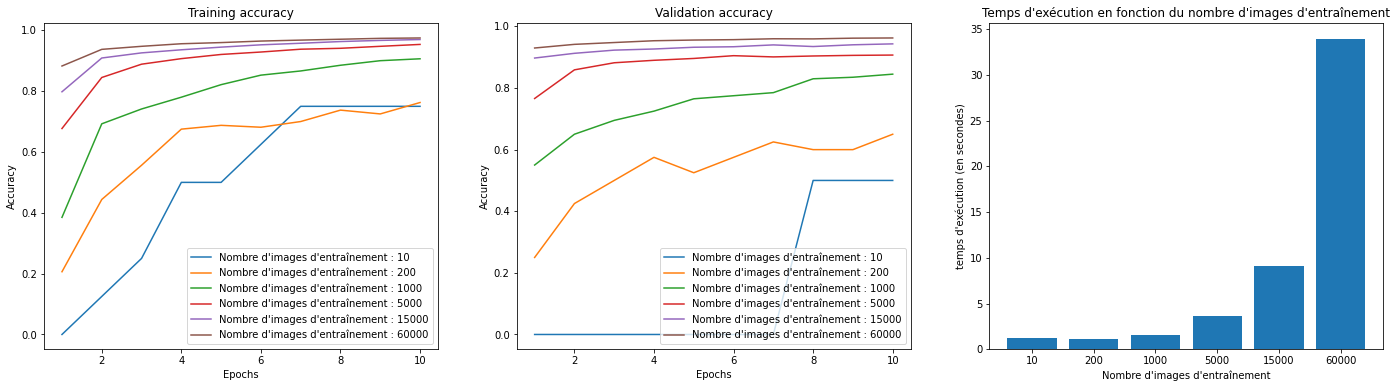

In [ ]:
plt.figure(figsize=(24,6))

plt.subplot(131)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
for i in range(len(train_sizes)):
  plt.plot(np.arange(1,11,1), training_histories[i].history['accuracy'], label="Nombre d'images d'entraînement : {}".format(train_sizes[i]))
plt.legend()

plt.subplot(132)
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
for i in range(len(train_sizes)):
  plt.plot(np.arange(1,11,1), training_histories[i].history['val_accuracy'], label="Nombre d'images d'entraînement : {}".format(train_sizes[i]))
plt.legend()

plt.subplot(133)
plt.title("Temps d'exécution en fonction du nombre d'images d'entraînement")
plt.xlabel("Nombre d'images d'entraînement")
plt.ylabel("temps d'exécution (en secondes)")
plt.bar(np.arange(1,7,1), times)
plt.xticks(ticks=np.arange(1,7,1), labels=train_sizes);

# <a name="architecture"></a> V - Influence de l'architecture du réseau de neurones

## <a name="dense"></a> A - Architecture très basique VS architecture plus complexe

Nous allons maintenant évaluer l'influence de l'architecture d'un modèle sur ses performances.
- (a) Exécuter la cellule suivante pour instancier le modèle très simple que nous avons utilisé dans les parties précédentes.

In [ ]:
model1 = Sequential()
model1.add(Dense(units = 20, input_dim = num_pixels, kernel_initializer ='normal', activation ='tanh'))             
model1.add(Dense(units = num_classes, kernel_initializer ='normal', activation ='softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

- (b) Instancier un modèle appelé ```model2``` avec au moins trois couches denses (en comptant la couche finale). Vous êtes libres de choisir les paramètres des couches.

In [ ]:
model2 = Sequential()
model2.add(Dense(units = 1024, input_dim = num_pixels, kernel_initializer ='normal', activation ='tanh')) 
model2.add(Dense(units = 256, kernel_initializer ='normal', activation ='tanh'))             
model2.add(Dense(units = num_classes, kernel_initializer ='normal', activation ='softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

- (c) Entraîner les modèles grâce à la méthode ```fit``` :
>  - L'entraînement devra se faire sur 10 epochs (paramètre ```epochs```).
>  
>  - Les batchs devront avoir une taille de 20 (paramètre ```batch_size```)
>
>  - La perfomance du modèle devra être évaluée sur un échantillon de validation contenant 20% des données (paramètre ```validation_split```).
>
>  - La sortie des entraînements devra être stockée dans des variables appelées ```training_history_1``` et ```training_history_2```.

In [ ]:
training_history_1 = model1.fit(X_train, y_train, epochs = 10, batch_size = 20, validation_split = 0.2)

Epoch 1/10
2400/2400 [==============================] - 4s 1ms/step - loss: 0.8607 - accuracy: 0.8022 - val_loss: 0.2612 - val_accuracy: 0.9262
Epoch 2/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2528 - accuracy: 0.9281 - val_loss: 0.2171 - val_accuracy: 0.9392
Epoch 3/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2041 - accuracy: 0.9411 - val_loss: 0.1994 - val_accuracy: 0.9442
Epoch 4/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1821 - accuracy: 0.9482 - val_loss: 0.1873 - val_accuracy: 0.9482
Epoch 5/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1633 - accuracy: 0.9531 - val_loss: 0.1864 - val_accuracy: 0.9479
Epoch 6/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1520 - accuracy: 0.9555 - val_loss: 0.1763 - val_accuracy: 0.9503
Epoch 7/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1414 - accuracy: 0.9588 - val_loss: 0.1783 - val_accuracy:

In [ ]:
training_history_2 = model2.fit(X_train, y_train, epochs = 10, batch_size = 20, validation_split = 0.2)

Epoch 1/10
2400/2400 [==============================] - 20s 8ms/step - loss: 0.3480 - accuracy: 0.8935 - val_loss: 0.1760 - val_accuracy: 0.9486
Epoch 2/10
2400/2400 [==============================] - 19s 8ms/step - loss: 0.1341 - accuracy: 0.9579 - val_loss: 0.1336 - val_accuracy: 0.9594
Epoch 3/10
2400/2400 [==============================] - 19s 8ms/step - loss: 0.1041 - accuracy: 0.9678 - val_loss: 0.1304 - val_accuracy: 0.9617
Epoch 4/10
2400/2400 [==============================] - 19s 8ms/step - loss: 0.0905 - accuracy: 0.9713 - val_loss: 0.1210 - val_accuracy: 0.9650
Epoch 5/10
2400/2400 [==============================] - 20s 8ms/step - loss: 0.0707 - accuracy: 0.9785 - val_loss: 0.1209 - val_accuracy: 0.9647
Epoch 6/10
2400/2400 [==============================] - 20s 8ms/step - loss: 0.0603 - accuracy: 0.9801 - val_loss: 0.1153 - val_accuracy: 0.9683
Epoch 7/10
2400/2400 [==============================] - 20s 8ms/step - loss: 0.0560 - accuracy: 0.9809 - val_loss: 0.1166 - val_ac

- (d) Tracer sur un même graphe l'évolution de la précision d'entraînement en fonction des epochs pour les deux modèles.

- (e) Sur un deuxième graphe, tracer l'évolution de la précision de validation en fonction des epochs pour les deux modèles.

Que constatez-vous?

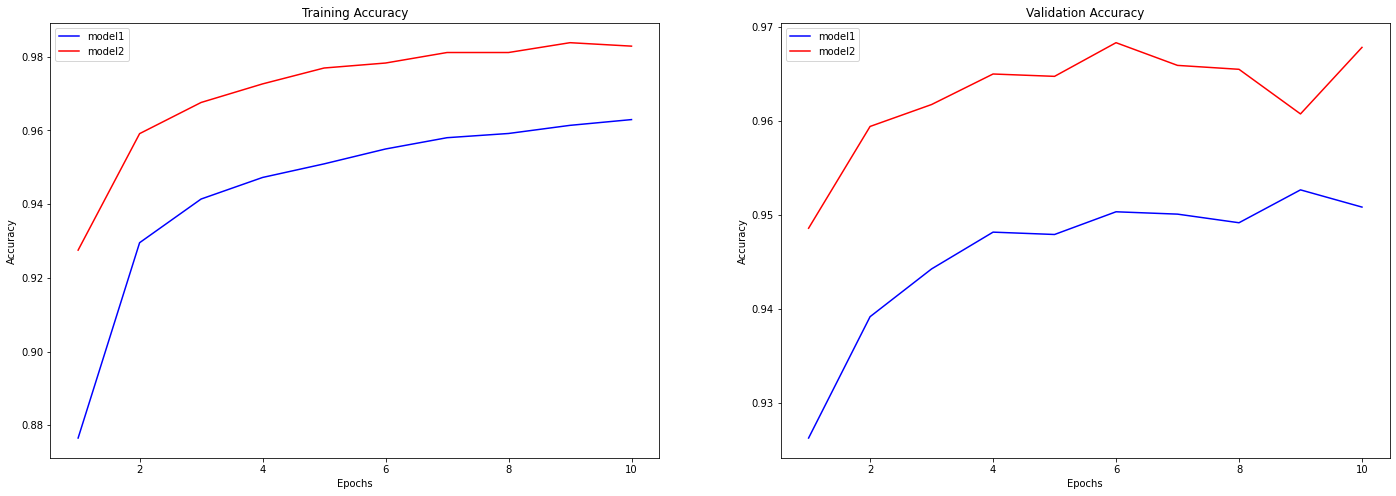

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(121)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(np.arange(1 , 11, 1), training_history_1.history['accuracy'], label = 'model1', color='blue')
plt.plot(np.arange(1 , 11, 1), training_history_2.history['accuracy'], label = 'model2', color='red')
plt.legend()

plt.subplot(122)
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(np.arange(1 , 11, 1), training_history_1.history['val_accuracy'], label = 'model1', color='blue')
plt.plot(np.arange(1 , 11, 1), training_history_2.history['val_accuracy'], label = 'model2', color='red')
plt.legend();

## <a name="CNN"></a> B - Introduction aux réseaux de neurones convolutionnels


Les couches denses ne sont pas les seules couches que l'on peut créer sur python. Par exemple, on peut définir le réseau de convolution suivant (architecture **LeNet**), qui est bien plus adapté au traitement des images que les modèles définis précédemment.
- (f) Exécuter les cellules suivantes pour constater l'efficacité de l'architecture **LeNet**.

In [ ]:
X_train_conv = X_train.reshape((-1, 28, 28, 1))
X_test_conv = X_test.reshape((-1, 28, 28, 1))

model_conv = Sequential()
model_conv.add(Conv2D(filters=30, kernel_size=(5,5), padding='valid', input_shape=(28,28,1), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2,2)))
model_conv.add(Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2,2)))
model_conv.add(Dropout(rate=0.2))
model_conv.add(Flatten())
model_conv.add(Dense(units = 128, activation ='relu'))             
model_conv.add(Dense(units = num_classes, activation ='softmax'))

model_conv.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
training_history_conv = model_conv.fit(X_train_conv, y_train, epochs = 10, batch_size = 20, validation_split = 0.2)

Epoch 1/10
2400/2400 [==============================] - 37s 15ms/step - loss: 0.4091 - accuracy: 0.8727 - val_loss: 0.0632 - val_accuracy: 0.9823
Epoch 2/10
2400/2400 [==============================] - 36s 15ms/step - loss: 0.0695 - accuracy: 0.9782 - val_loss: 0.0442 - val_accuracy: 0.9871
Epoch 3/10
2400/2400 [==============================] - 36s 15ms/step - loss: 0.0500 - accuracy: 0.9842 - val_loss: 0.0486 - val_accuracy: 0.9860
Epoch 4/10
2400/2400 [==============================] - 36s 15ms/step - loss: 0.0405 - accuracy: 0.9867 - val_loss: 0.0375 - val_accuracy: 0.9893
Epoch 5/10
2400/2400 [==============================] - 37s 15ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0414 - val_accuracy: 0.9882
Epoch 6/10
2400/2400 [==============================] - 36s 15ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0337 - val_accuracy: 0.9902
Epoch 7/10
2400/2400 [==============================] - 37s 15ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0358 -

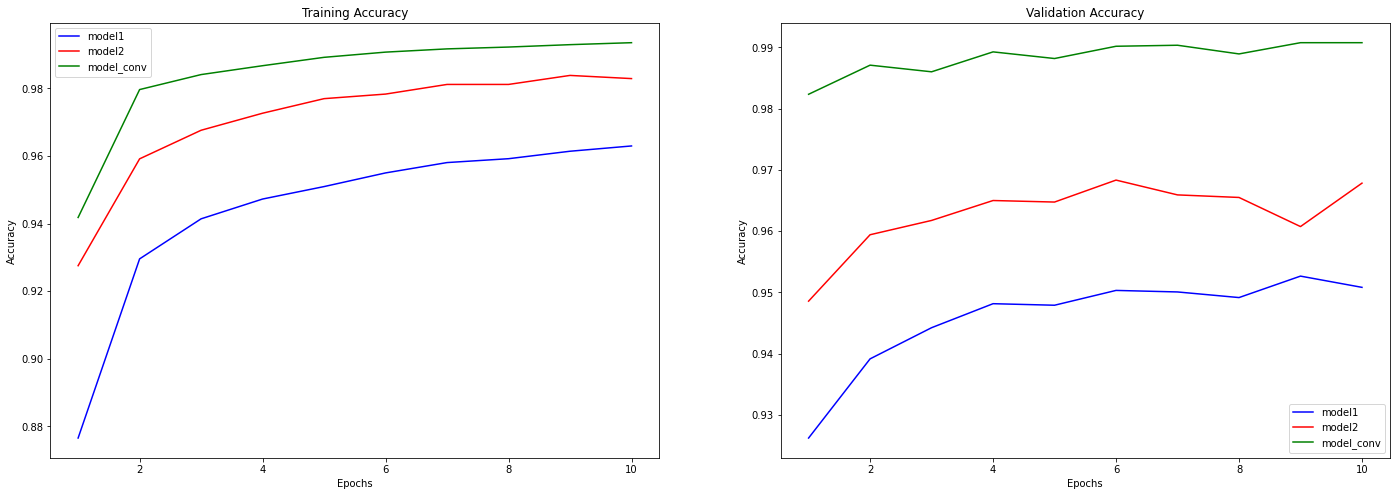

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(121)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(np.arange(1 , 11, 1), training_history_1.history['accuracy'], label = 'model1', color='blue')
plt.plot(np.arange(1 , 11, 1), training_history_2.history['accuracy'], label = 'model2', color='red')
plt.plot(np.arange(1 , 11, 1), training_history_conv.history['accuracy'], label = 'model_conv', color='green')
plt.legend()

plt.subplot(122)
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(np.arange(1 , 11, 1), training_history_1.history['val_accuracy'], label = 'model1', color='blue')
plt.plot(np.arange(1 , 11, 1), training_history_2.history['val_accuracy'], label = 'model2', color='red')
plt.plot(np.arange(1 , 11, 1), training_history_conv.history['val_accuracy'], label = 'model_conv', color='green')
plt.legend();